In [363]:
# Important libaries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [364]:
month = 'May'

In [365]:
# Read original CSV data
filename = "W:/DS/Programming/vehicle_" + month +".csv"
vehicledf = pd.read_csv(filename)

In [366]:
GATENAME = {5: 'วิศวกรรมศาสตร์',
 30: 'แยก อมช',
 34: 'แยกบริหาร',
 4: 'เกษตรศาสตร์',
 33: 'วงเวียนหอนาฬิกา',
 1: 'หน้ามหาวิทยาลัย',
 27: 'วงเวียนสนามเทนนิส',
 25: 'วงเวียนมนุษย์',
 32: 'แยกโรงอาหารใหม่',
 41: 'สวนดอกพาร์ค',
 23: 'วงเวียน SCB',
 24: 'วงเวียนอ่างตาดชมพู',
 36: 'วิศวกรรมศาสตร์ใหม่',
 3: 'คันคลองชลประทาน',
 22: 'แยกอ่างแก้ว',
 26: 'แยกประตูไผ่ล้อม',
 2: 'ไผ่ล้อม',
 29: 'ลานจอดรถ อมช',
 31: 'ลานจอดรถฝายหิน',
 42: 'POC-ENG-in',
 20: 'แยกตึกอธิการบดี',
 18: 'ศึกษาศาสตร์',
 38: 'ลานจอดรถ  S1',
 19: 'ปตท.ใหม่',
 35: 'ลานจอดรถไร่ฟอร์ด',
 28: 'ลานจอดรถหอ 40 ปี',
 21: 'ลานจอดรถหน้ามอ',
 40: 'จอดรถโรงอาหารกลาง',
 37: 'อาคารสำนักงาน 3',
 39: 'ข่วงพยอม'}

In [367]:
vehicledf.head()

,Unnamed: 0,plate_number,type,is_registered,direction,gate_id,month,day,hour,min,sec
0,4661,งค5145,car,False,o,33,May,18,13,7,21
1,4665,งพ2143,car,False,o,22,May,18,13,7,25
2,4672,มช023,car,False,o,23,May,18,13,7,38
3,4675,บท9289,car,False,o,33,May,18,13,8,14
4,4676,835949,car,False,i,32,May,18,13,8,15


# Data Cleaning and Encoding

Get rid of some unnecessary columns and encode features:

In [368]:
def clean(df):
    return df.drop(columns = ['Unnamed: 0','month'])
def encode(df):
    df['plate_number'] = df['plate_number'].astype('category').cat.codes
    #df['type'] = df['type'].astype('category').cat.codes # 0 as car 1 as motorcycle
    df['is_registered'] = df['is_registered'].astype('category').cat.codes # 0 as false 1 as true
    df['direction'] = df['direction'].astype('category').cat.codes # 0 as i 1 as o


In [369]:
df = clean(vehicledf)
encode(df)

In [370]:
df.head()

,plate_number,type,is_registered,direction,gate_id,day,hour,min,sec
0,194070,car,0,1,33,18,13,7,21
1,209017,car,0,1,22,18,13,7,25
2,266337,car,0,1,23,18,13,7,38
3,253584,car,0,1,33,18,13,8,14
4,113754,car,0,0,32,18,13,8,15


# Feature Transformation

Get only the information at main gates:

In [371]:
gatemask = True

In [372]:
'''{19: 'ปตท.ใหม่',
 4: 'เกษตรศาสตร์',
 1: 'หน้ามหาวิทยาลัย',
 36: 'วิศวกรรมศาสตร์ใหม่',
 5: 'วิศวกรรมศาสตร์',
 2: 'ไผ่ล้อม',
 18: 'ศึกษาศาสตร์',
 42: 'POC-ENG-in'}
'''
if gatemask:
    entrance_mask = [19,4,1,36,5,2,18,42]
    df = df[df['gate_id'].isin(entrance_mask )]

Don't care what time of the day the vehicle get in or out, count only the numbers of time they do.

In [373]:
df2 = df.drop(columns = ['min','sec'])

In [374]:
df2.head()

,plate_number,type,is_registered,direction,gate_id,day,hour
8,96393,car,0,0,4,18,13
10,1514,car,0,0,4,18,13
11,104721,car,0,1,4,18,15
13,104956,car,0,0,4,18,16
15,107665,car,0,0,4,18,16


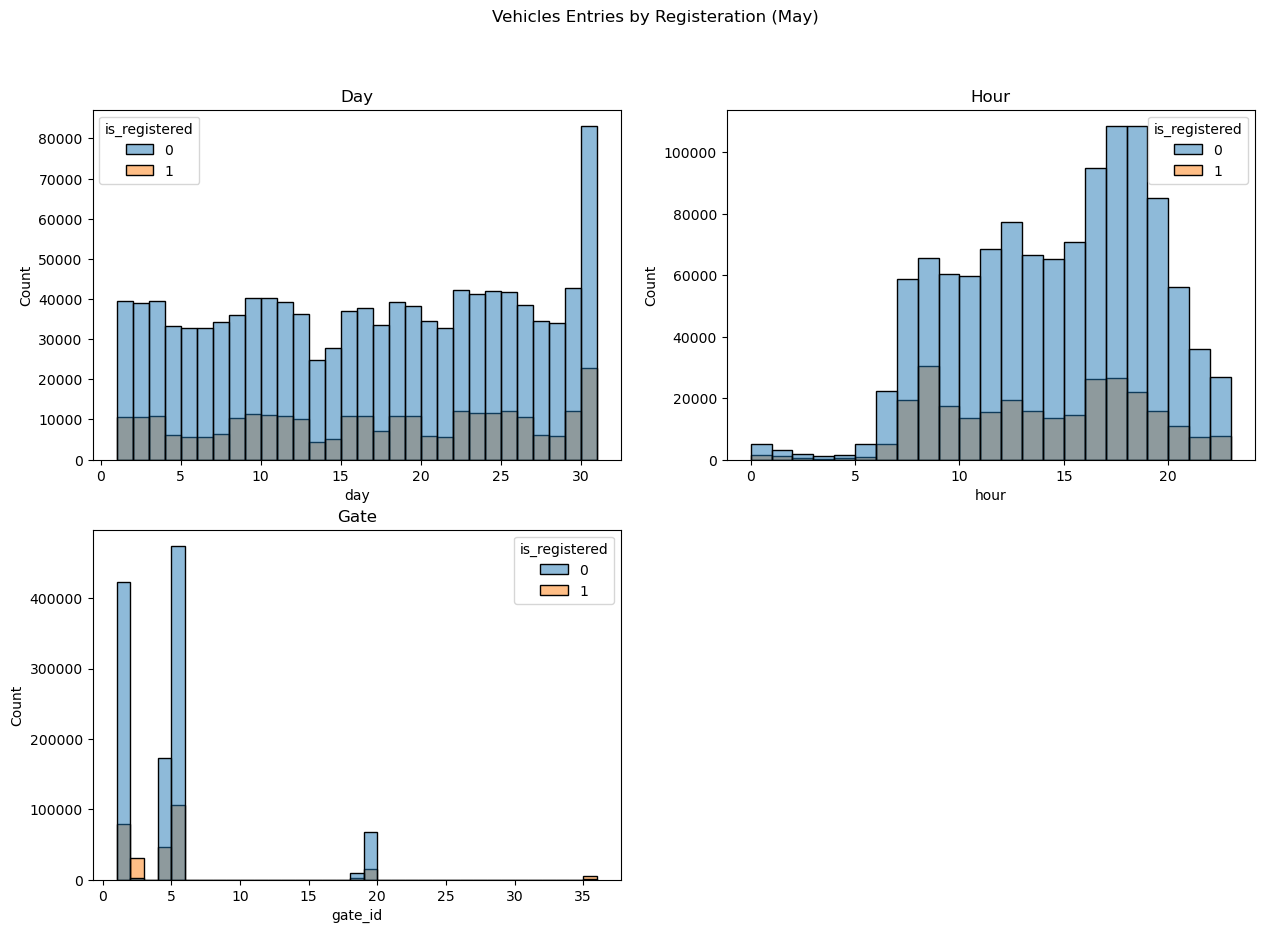

In [375]:
fig, axes = plt.subplots(2, 2,figsize=(15,10))
axes = axes.flatten()

ax = sns.histplot(data = df2, x = 'day', binwidth=1, hue = 'is_registered',ax = axes[0])
ax = sns.histplot(data = df2, x = 'hour', binwidth=1, hue = 'is_registered',ax = axes[1])
ax = sns.histplot(data = df2, x = 'gate_id', binwidth=1, hue = 'is_registered',ax = axes[2])

axes[0].set_title('Day')
axes[1].set_title('Hour')
axes[2].set_title('Gate')

fig.delaxes(axes[3])

fig.suptitle('Vehicles Entries by Registeration (' + month +')')   
plt.show()



In [376]:
list(df2.drop(columns = 'plate_number').columns)

['type', 'is_registered', 'direction', 'gate_id', 'day', 'hour']

In [377]:
df3 = df2[['plate_number','type','is_registered']].value_counts().reset_index(name='counts')
df3.head()

,plate_number,type,is_registered,counts
0,82939,motorcycle,1,933
1,86818,motorcycle,1,914
2,83975,motorcycle,0,653
3,87274,motorcycle,0,641
4,95991,car,1,598


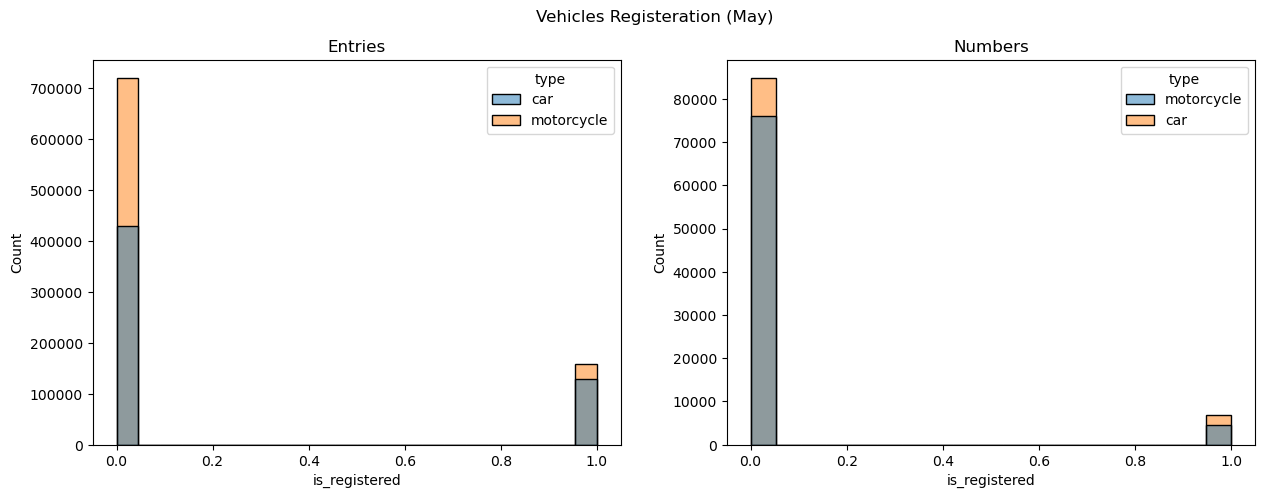

In [383]:
fig, axes = plt.subplots(1, 2,figsize=(15,5))
axes = axes.flatten()

ax = sns.histplot(data = df2, x = 'is_registered', hue = 'type',ax = axes[0])
ax = sns.histplot(data = df3, x = 'is_registered', hue = 'type',ax = axes[1])


axes[0].set_title('Entries')
axes[1].set_title('Numbers')

fig.suptitle('Vehicle Registeration (' + month +')')   
plt.show()
